# Product and Retail Data Analysis

### Author : Nusriya.K

### Context of Data
* Company - UK-based and registered non-store online retail
* Products for selling - Mainly all-occasion gifts
* Customers - Most are wholesalers (local or international)
* Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

### Data Import and Pre-processing

In [271]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [272]:
# loading the data
df=pd.read_excel("e-commerce_data.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [273]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France


In [274]:
#To show total rows and columns
df.shape

(541909, 8)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [276]:
#unique count on each coloumn
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [277]:
#Number of Unique Countries 
print(df.Country.unique())
df.Country.unique().shape

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


(38,)

In [278]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [279]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-01-12 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-01-12 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-01-12 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-01-12 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-01-12 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-01-12 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-01-12 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-01-12 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-01-12 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-01-12 14:32:00,0.43,NaN,United Kingdom


In [280]:
# new_df without missing values
df2 = df.dropna()

In [281]:
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [282]:
# To check any duplicate rows
df2.duplicated().sum()

5225

In [283]:
#dropping those duplicate rows
df2.drop_duplicates(inplace=True)
df2.duplicated().sum()

0

In [284]:
df2.shape

(401604, 8)

In [285]:
# change the invoice_date format - String to Timestamp format
df2['InvoiceDate'] = pd.to_datetime(df2.InvoiceDate, format='%m/%d/%Y %H:%M')
df2.StockCode=df2.StockCode.astype(str)


In [286]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


### Basic Statistical Details


In [288]:
# Statistical Details of numerical Columns
df2.describe().drop(columns=['InvoiceDate','CustomerID']).T


,count,mean,min,25%,50%,75%,max,std
Quantity,401604.0,12.183273,-80995.0,2.00,5.00,12.00,80995.0,250.283037
UnitPrice,401604.0,3.474064,0.0,1.25,1.95,3.75,38970.0,69.764035


In [289]:
# string columns
str_cols= df2.select_dtypes("object").columns
print(str_cols)
df2[str_cols].describe().T

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')


,count,unique,top,freq
InvoiceNo,401604,22190,576339,542
StockCode,401604,3684,85123A,2065
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058
Country,401604,37,United Kingdom,356728


<Axes: xlabel='Quantity'>

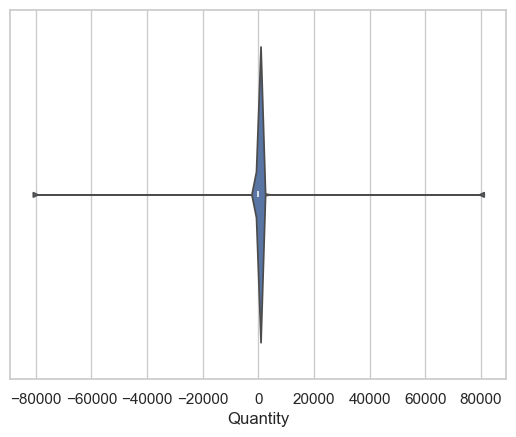

In [290]:
sns.set(style="whitegrid")
sns.violinplot(x=df2["Quantity"])


In [291]:
# remove negative quanitites

df2 = df2[df2.Quantity > 0]


<Axes: xlabel='Quantity'>

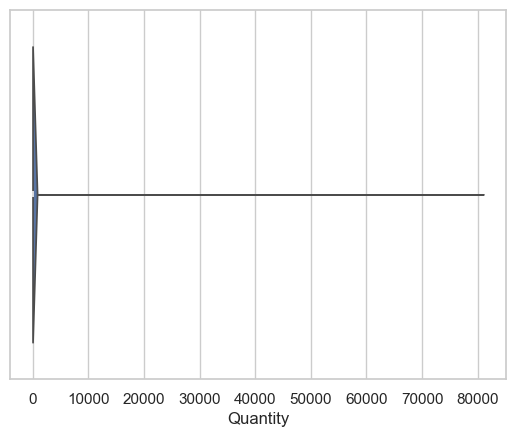

In [292]:
sns.violinplot(x=df2["Quantity"])

In [293]:
#Calculate AmountSpent from UnitPrice and Quantity
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [294]:
#extract  Day, Month and year in to separate Colummns that we'll use for further analysis
df2['Day'] = df2['InvoiceDate'].dt.day
df2['Month_Num'] = df2['InvoiceDate'].dt.month  # month_number will be retrieved
df2['Month'] = df2['InvoiceDate'].dt.strftime('%B') # month_name 
df2['Year'] = df2['InvoiceDate'].dt.year
df2['Day_of_Week']=df2['InvoiceDate'].dt.weekday # 0 implies Monday and 6 means Sunday
# Insert a new column at index 4 with  Hour extracted from InvoiceDate
df2.insert(loc=4, column='hour', value=df2.InvoiceDate.dt.hour)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Day,Month_Num,Month,Year,Day_of_Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,January,2010,1
1,536365,71053,WHITE METAL LANTERN,6,8,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,January,2010,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,January,2010,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,January,2010,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,January,2010,1


In [295]:
df2.Day_of_Week.unique()

array([1, 4, 2, 5, 0, 3, 6])

In [296]:
df2.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
hour              15
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
AmountSpent     2940
Day               31
Month_Num         12
Month             12
Year               2
Day_of_Week        7
dtype: int64

## Data Visualization and Analysis

### Customer Analysis

In [299]:
# Consolidating the number of Orders Made per customer for each country
# We use InvoiceNo as the count for sales/orders

sales_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberofOrders"]
sales_per_cust.head(10)

,CustomerID,Country,NumberofOrders
4019,17841.0,United Kingdom,7676
1888,14911.0,EIRE,5672
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4413
1670,14606.0,United Kingdom,2677
2185,15311.0,United Kingdom,2366
1698,14646.0,Netherlands,2080
570,13089.0,United Kingdom,1814
699,13263.0,United Kingdom,1667
1443,14298.0,United Kingdom,1637


Text(0.5, 1.0, 'Number of Orders for different Customers by each Country ')

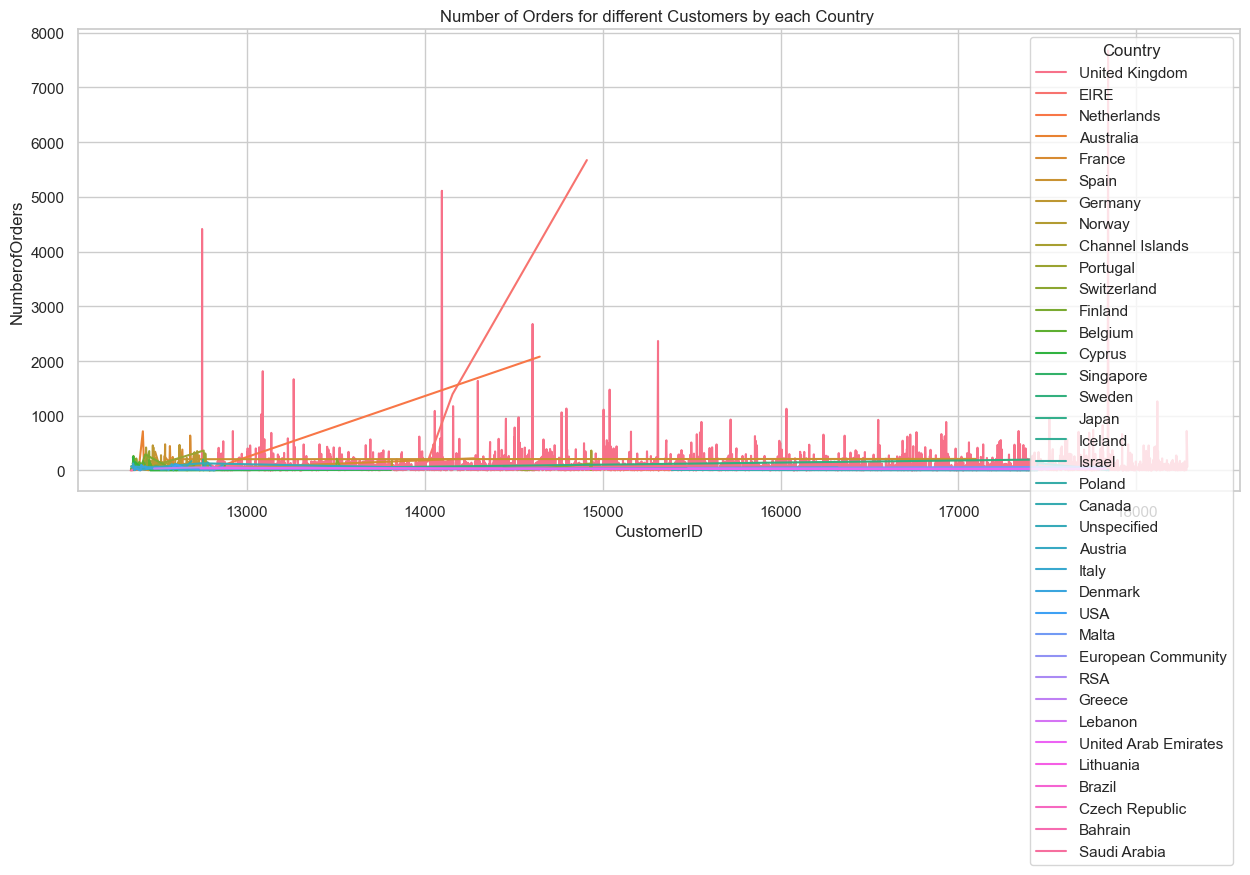

In [300]:
# Visualizing No. of Sales per Customer for each country
plt.figure(figsize=(15,6))
sns.lineplot(data=sales_per_cust,x='CustomerID',y='NumberofOrders',hue='Country')
plt.title('Number of Orders for different Customers by each Country ')

* The customer with the highest number of orders comes from the United Kingdom (UK)

In [302]:
# Money Spent by each Customer
money_spent_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum().sort_values(by=['AmountSpent'],ascending=False)
money_spent_per_cust.columns = ['CustomerID', 'Country', "TotalExpenditure"]
money_spent_per_cust.head(10)

,CustomerID,Country,TotalExpenditure
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194390.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143711.17
57,12415.0,Australia,124914.53
1342,14156.0,EIRE,117210.08
3780,17511.0,United Kingdom,91062.38
2711,16029.0,United Kingdom,80850.84
0,12346.0,United Kingdom,77183.60


Text(0.5, 1.0, 'TotalExpenditure by each Customer ')

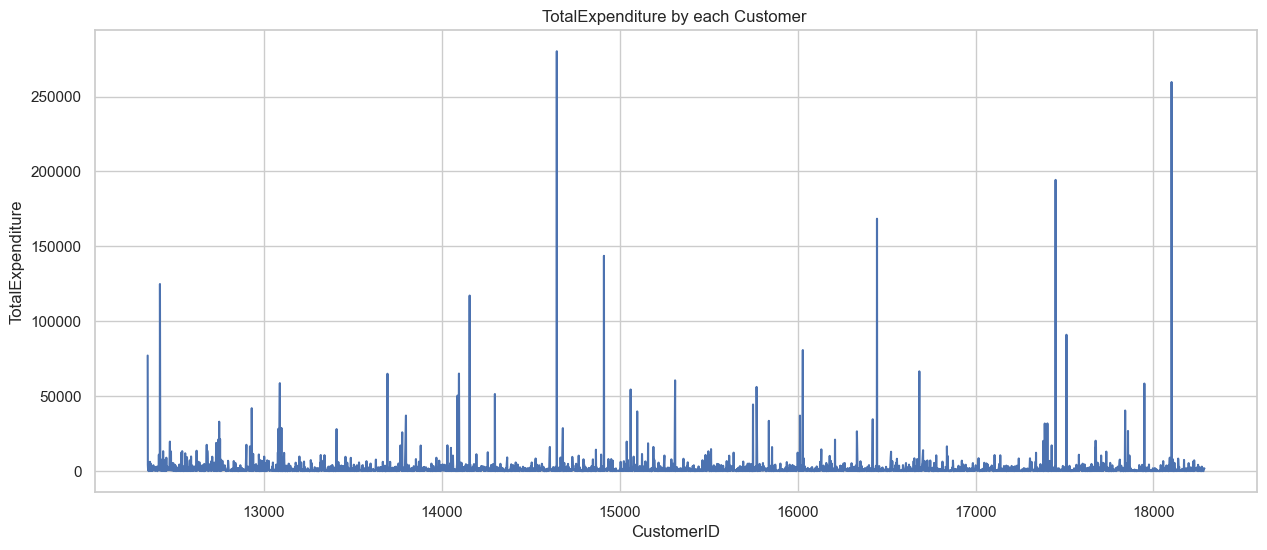

In [303]:
#visualization of total expenditure by each customer
plt.figure(figsize=(15,6))
sns.lineplot(data=money_spent_per_cust,x='CustomerID',y='TotalExpenditure')
plt.title('TotalExpenditure by each Customer ')    

* The customer with the highest money spent on purchases comes from Netherlands. 
* The customer that spent least comes from Saudi Arabia 

### Repeat Customers

In [306]:
df_repeat_cust=df2.groupby(['CustomerID','Country']).size().reset_index(name='Count').sort_values(by=['Count'],ascending=False)
df_repeat_cust['CustomerID']=df_repeat_cust['CustomerID'].astype(str) # float to string
df_repeat_cust

,CustomerID,Country,Count
4019,17841.0,United Kingdom,7676
1888,14911.0,EIRE,5672
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4413
1670,14606.0,United Kingdom,2677
...,...,...,...
605,13135.0,United Kingdom,1
728,13302.0,United Kingdom,1
4082,17923.0,United Kingdom,1
643,13185.0,United Kingdom,1


Text(0.5, 1.0, 'Top 10 Repeat Customers')

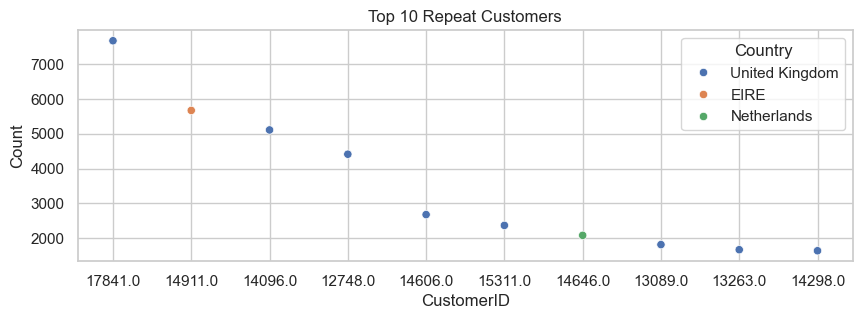

In [307]:
#visualization of Top 10 repeat customer and their country
plt.figure(figsize=(10,3))
sns.scatterplot(data=df_repeat_cust.head(10),x='CustomerID',y='Count',hue='Country')
plt.title("Top 10 Repeat Customers")

In [308]:
# Merge df_repeat_cust, sales_per_cust, money_spent_per_cust
sales_per_cust['CustomerID']=sales_per_cust['CustomerID'].astype(str) # float to string
money_spent_per_cust['CustomerID']=money_spent_per_cust['CustomerID'].astype(str) # float to string
Customer_1= pd.merge(df_repeat_cust, sales_per_cust, on=['CustomerID','Country'],how='left')
Customer=  pd.merge(Customer_1, money_spent_per_cust, on=['CustomerID','Country'],how='left')
Customer

,CustomerID,Country,Count,NumberofOrders,TotalExpenditure
0,17841.0,United Kingdom,7676,7676,40519.84
1,14911.0,EIRE,5672,5672,143711.17
2,14096.0,United Kingdom,5111,5111,65164.79
3,12748.0,United Kingdom,4413,4413,33053.19
4,14606.0,United Kingdom,2677,2677,12076.15
...,...,...,...,...,...
4342,13135.0,United Kingdom,1,1,3096.00
4343,13302.0,United Kingdom,1,1,63.75
4344,17923.0,United Kingdom,1,1,207.50
4345,13185.0,United Kingdom,1,1,71.40


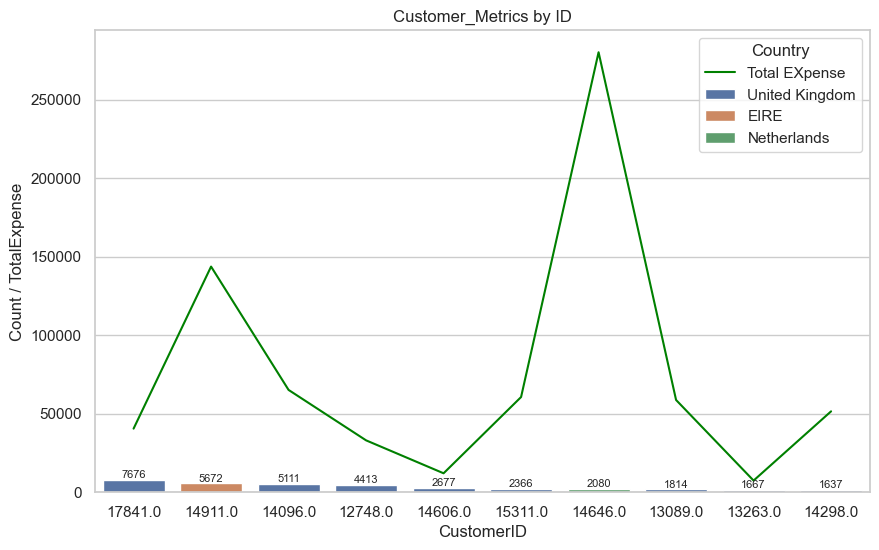

In [309]:
plt.figure(figsize=(10,6))
sns.lineplot(data=Customer.head(10),x='CustomerID',y='TotalExpenditure',label='Total EXpense',color='green')
plot=sns.barplot(data=Customer.head(10),x='CustomerID',y='NumberofOrders',hue='Country')
for i in plot.containers:
    plot.bar_label(i,label_type='edge',fontsize=8)
plt.title("Customer_Metrics by ID")
plt.ylabel('Count / TotalExpense')
plt.show()

### Analysis by Country

In [311]:
# Orders made by each Country
order_by_country= df2.groupby(['Country'],as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
order_by_country.columns=['Country','Total_Order']
order_by_country.head()

,Country,Total_Order
35,United Kingdom,349227
14,Germany,9027
13,France,8327
10,EIRE,7228
30,Spain,2480


Text(0.5, 1.0, 'Total_Order by each Country ')

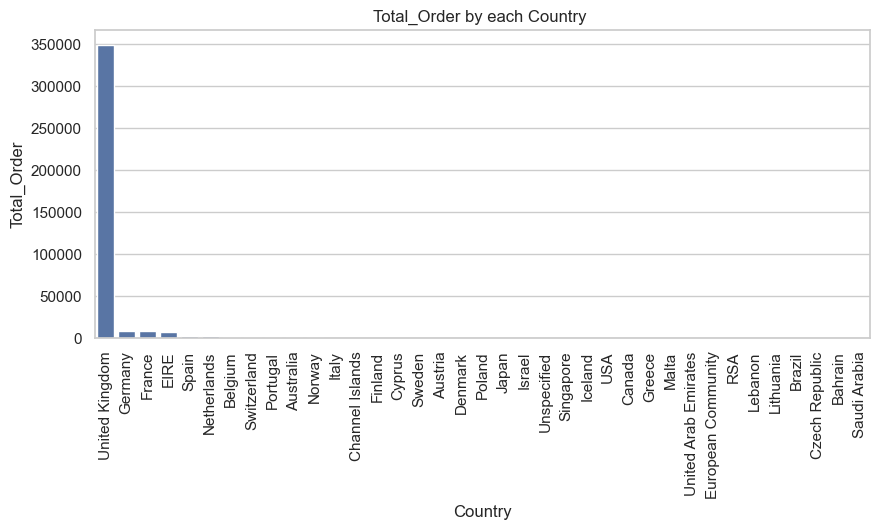

In [312]:
# Visualization of Orders made by each Country
plt.figure(figsize=(10,4))
sns.barplot(data=order_by_country,x='Country',y='Total_Order')
plt.xticks(rotation=90)
plt.title('Total_Order by each Country ')    

* Ordes primarily come from UK,followed by Germany. The fewest orders come from Bahrain and Saudi Arabia 

In [314]:
#Total_Expenditure by each Country
money_spent_by_country = df2.groupby(by=['Country'], as_index=False)['AmountSpent'].sum().sort_values(by=['AmountSpent'],ascending=False)
money_spent_by_country.columns = [ 'Country', "TotalExpenditure"]
money_spent_by_country.head()

,Country,TotalExpenditure
35,United Kingdom,7285024.644
23,Netherlands,285446.340
10,EIRE,265262.460
14,Germany,228678.400
13,France,208934.310


Text(0.5, 1.0, 'TotalExpenditure by each Country ')

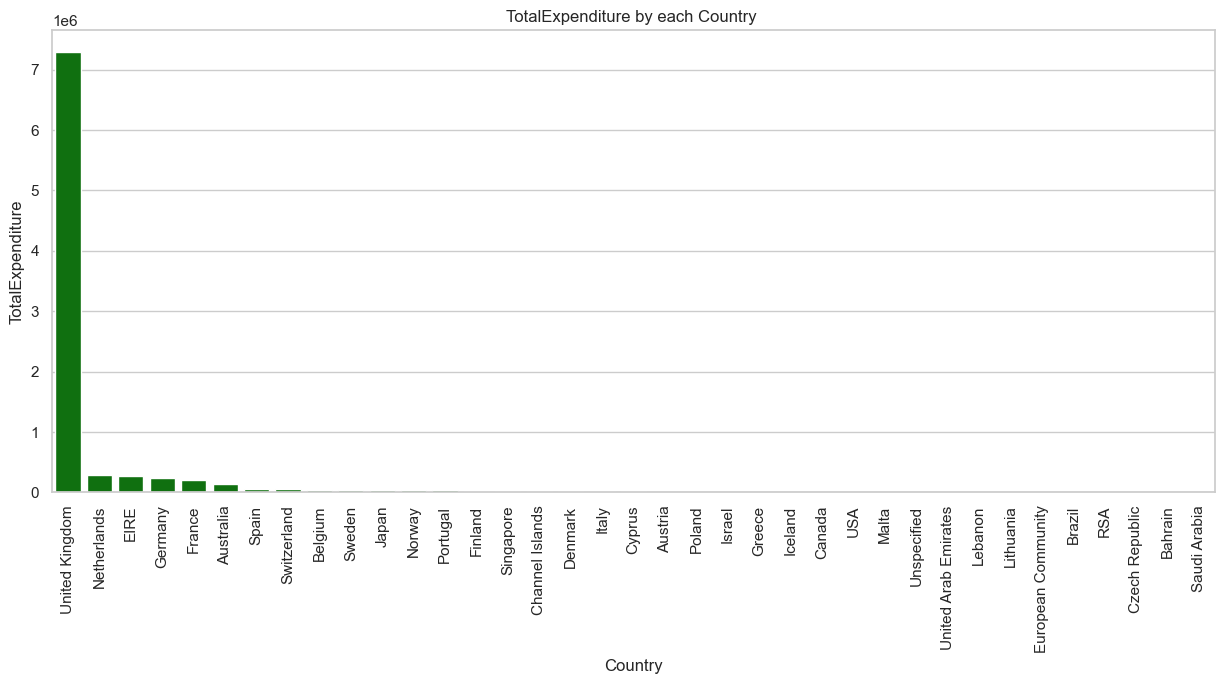

In [315]:
#visualization of total expenditure by each country
plt.figure(figsize=(15,6))
sns.barplot(data=money_spent_by_country,x='Country',y='TotalExpenditure',color='green')
plt.xticks(rotation=90)
plt.title('TotalExpenditure by each Country ')    

* Total Expenditure by customers is highest for UK and significantly lower from Bahrain and Saudi Arabia 

### Purchasing Patterns

In [318]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   hour         392732 non-null  int32         
 5   InvoiceDate  392732 non-null  datetime64[ns]
 6   UnitPrice    392732 non-null  float64       
 7   CustomerID   392732 non-null  float64       
 8   Country      392732 non-null  object        
 9   AmountSpent  392732 non-null  float64       
 10  Day          392732 non-null  int32         
 11  Month_Num    392732 non-null  int32         
 12  Month        392732 non-null  object        
 13  Year         392732 non-null  int32         
 14  Day_of_Week  392732 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32

In [319]:
# Number of Orders Per Month
order_by_Month= df2.groupby((['Month_Num','Month']),as_index=False)['InvoiceNo'].count().sort_values(by='Month_Num')
order_by_Month.columns=['Month_Num','Month','Total_Order']
order_by_Month

,Month_Num,Month,Total_Order
0,1,January,26771
1,2,February,24417
2,3,March,28193
3,4,April,26918
4,5,May,32156
5,6,June,34080
6,7,July,33044
7,8,August,31176
8,9,September,39263
9,10,October,43830


Text(0.5, 1.0, 'Total_Order on each Month ')

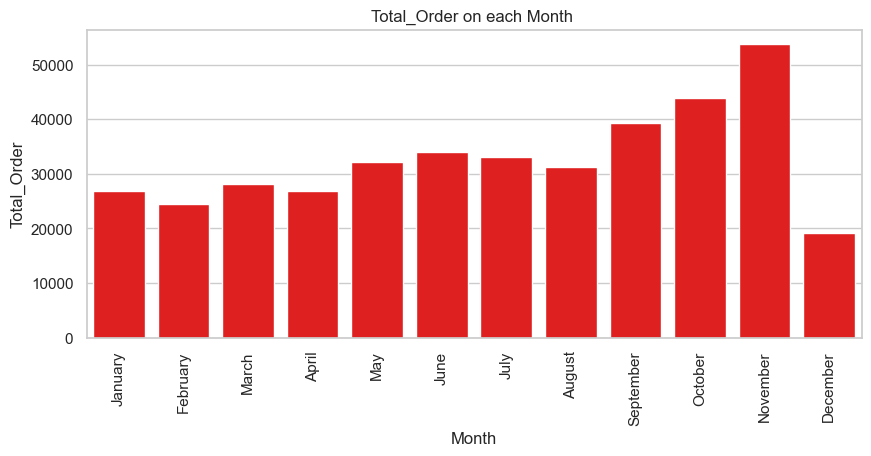

In [320]:
# Visualization of Orders made on each Month
plt.figure(figsize=(10,4))
sns.barplot(data=order_by_Month,x='Month',y='Total_Order',color='red')
plt.xticks(rotation=90)
plt.title('Total_Order on each Month ')    

* More order are made on November and least orders are made on December 

In [322]:
#Total_Expenditure by customers on each month
money_spent_on_month = df2.groupby(by=['Month'], as_index=False)['AmountSpent'].sum().sort_values(by=['AmountSpent'],ascending=False)
money_spent_on_month.columns = [ 'Month', "TotalExpenditure"]
money_spent_on_month.head()

,Month,TotalExpenditure
11,September,1131513.612
9,November,1039157.810
10,October,935414.330
5,July,787714.141
8,May,748844.180


Text(0.5, 1.0, 'TotalExpenditure by customer on each Month ')

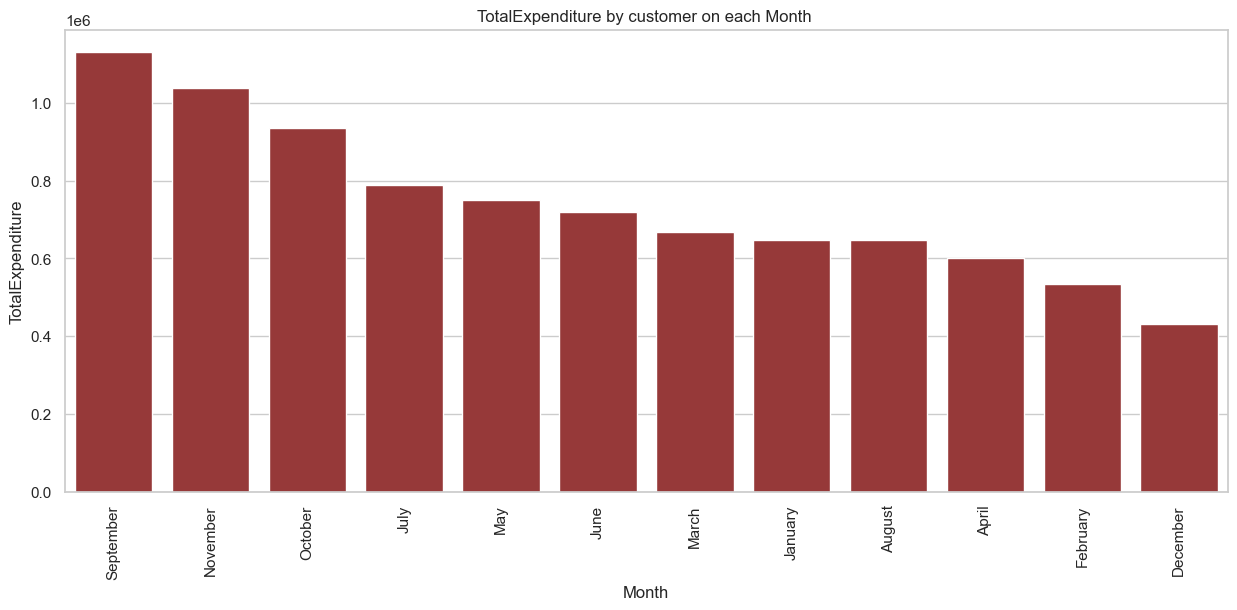

In [323]:
#visualization of total expenditure by customers on each month
plt.figure(figsize=(15,6))
sns.barplot(data=money_spent_on_month,x='Month',y='TotalExpenditure',color='brown')
plt.xticks(rotation=90)
plt.title('TotalExpenditure by customer on each Month ')    

* Total Expenditure is high on September and low on December 

In [325]:
# Number of Orders on each day of week
order_by_dayofweek= df2.groupby(['Day_of_Week'],as_index=False)['InvoiceNo'].count()
order_by_dayofweek.columns=['Day_of_Week','Total_Order']
order_by_dayofweek

,Day_of_Week,Total_Order
0,0,59670
1,1,66159
2,2,57064
3,3,70697
4,4,56328
5,5,22738
6,6,60076


In [326]:
#Total expense on each day_of_week
money_spent_on_dayofweek = df2.groupby(by=['Day_of_Week'], as_index=False)['AmountSpent'].sum()
money_spent_on_dayofweek.columns = [ 'Day_of_Week', "TotalExpenditure"]
money_spent_on_dayofweek

,Day_of_Week,TotalExpenditure
0,0,1479141.951
1,1,1707676.431
2,2,1278285.760
3,3,1709893.440
4,4,1269887.831
5,5,443100.670
6,6,999222.811


Text(0.5, 1.0, 'TotalExpenditure on each DayofWeek ')

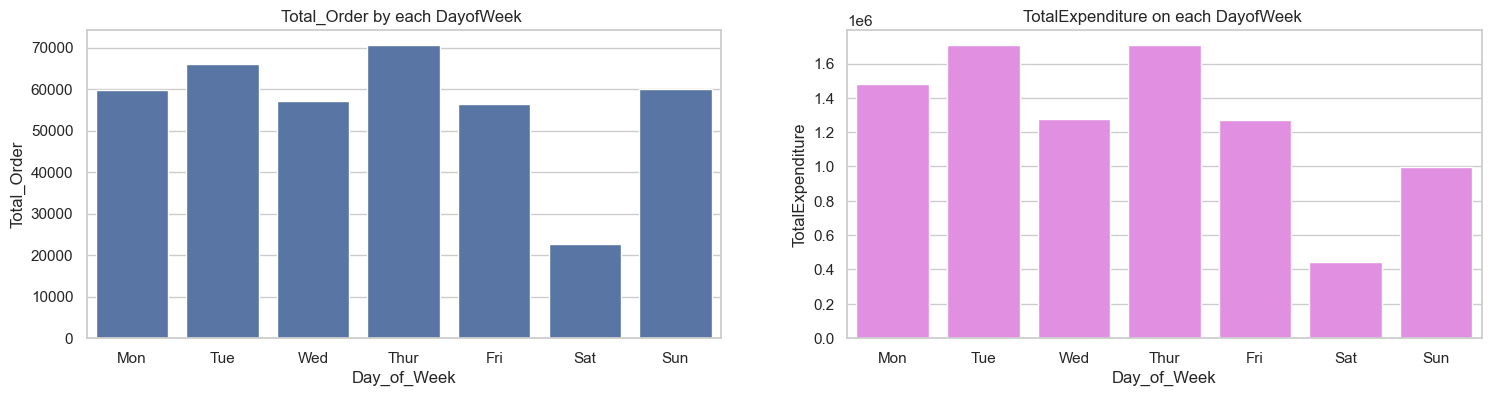

In [327]:
# Visualization of Orders made on each dayofweek
plt.figure(figsize=(18,4))

plt.subplot(121) 
sns.barplot(data=order_by_dayofweek,x='Day_of_Week',y='Total_Order')
day=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
plt.xticks(order_by_dayofweek.Day_of_Week,day)
plt.title('Total_Order by each DayofWeek ')   

plt.subplot(122)
sns.barplot(data=money_spent_on_dayofweek,x='Day_of_Week',y='TotalExpenditure', color='violet')
day=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
plt.xticks(money_spent_on_dayofweek.Day_of_Week,day)
plt.title('TotalExpenditure on each DayofWeek ')  



* There is an increase in orders from Monday to Thursday, with Saturday having the lowest orders but orders rise again on Sunday 

In [329]:
# Let's Plot the  number of orders per hour
order_by_hour= df2.groupby(['hour'],as_index=False)['InvoiceNo'].count().sort_values(by=['hour'])
order_by_hour.columns=['hour','Total_Order']
order_by_hour

,hour,Total_Order
0,6,1
1,7,379
2,8,8688
3,9,21928
4,10,37775
5,11,48373
6,12,70942
7,13,63024
8,14,53260
9,15,44793


Text(0.5, 1.0, 'Total Order on each Hour ')

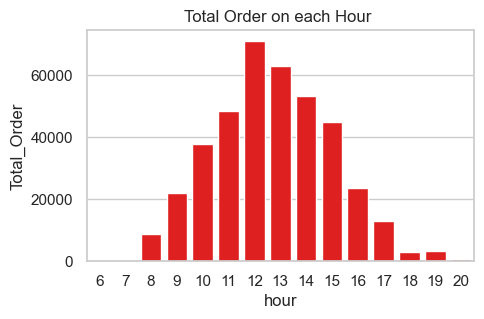

In [330]:
plt.figure(figsize=(5,3))
sns.barplot(data=order_by_hour,x='hour',y='Total_Order',color='red')
plt.title('Total Order on each Hour ')    

* Orders made by customers are peak at midday

### Analyse Unit Price of Items

In [333]:
df2.UnitPrice.describe()

count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

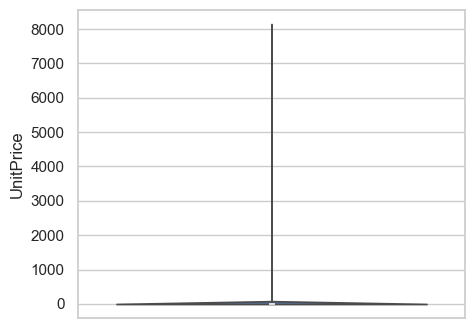

In [334]:
# check the distribution of unit price
plt.figure(figsize=(5,4))
sns.violinplot(df2.UnitPrice)
plt.show()

In [335]:
# What are the free items
df_free = df2[df2.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Day,Month_Num,Month,Year,Day_of_Week
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-05-12 14:02:00,0.0,12647.0,Germany,0.0,12,5,May,2010,2
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0,16,12,December,2010,3
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0,21,12,December,2010,1
47068,540372,22090,PAPER BUNTING RETROSPOT,24,16,2011-06-01 16:41:00,0.0,13081.0,United Kingdom,0.0,1,6,June,2011,2
47070,540372,22553,PLASTERS IN TIN SKULLS,24,16,2011-06-01 16:41:00,0.0,13081.0,United Kingdom,0.0,1,6,June,2011,2


In [336]:
# See when these free items were given out
df_free.Month.value_counts()

Month
November     6
October      5
March        5
July         5
August       4
December     3
June         3
April        3
May          2
January      2
September    2
Name: count, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

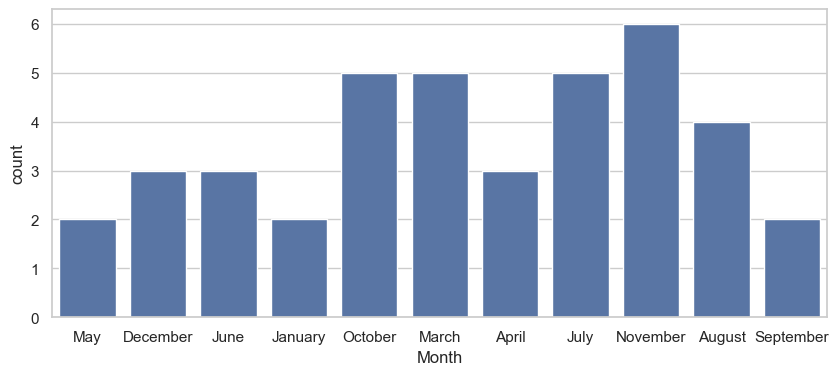

In [337]:
plt.figure(figsize=(10,4))
sns.countplot(data=df_free,x=df_free.Month)


* On average, the company gave out 2-4 times FREE items to customers each month (Except in February)

### Item Trends

In [340]:
print(df2.StockCode.nunique(),"Num of unique StockCode")
print(df2.Description.nunique(),"Num of unique Description")

3665 Num of unique StockCode
3877 Num of unique Description


In [341]:
# the best selling product
df_bestsellingProduct=df2.groupby(['Description','StockCode']).agg(Count=('StockCode','size'),TotalQuantity=('Quantity','sum'),Sales=('AmountSpent','sum')).reset_index().sort_values(by='Sales',ascending=False)
df_bestsellingProduct['Merged']=df_bestsellingProduct['StockCode']+'--'+df_bestsellingProduct["Description"]
df_bestsellingProduct


,Description,StockCode,Count,TotalQuantity,Sales,Merged
2328,"PAPER CRAFT , LITTLE BIRDIE",23843,1,80995,168469.600,"23843--PAPER CRAFT , LITTLE BIRDIE"
2780,REGENCY CAKESTAND 3 TIER,22423,1714,12384,142264.750,22423--REGENCY CAKESTAND 3 TIER
3718,WHITE HANGING HEART T-LIGHT HOLDER,85123A,2016,36706,100392.100,85123A--WHITE HANGING HEART T-LIGHT HOLDER
1769,JUMBO BAG RED RETROSPOT,85099B,1615,46078,85040.540,85099B--JUMBO BAG RED RETROSPOT
1999,MEDIUM CERAMIC TOP STORAGE JAR,23166,198,77916,81416.730,23166--MEDIUM CERAMIC TOP STORAGE JAR
...,...,...,...,...,...,...
2455,PINK CRYSTAL GUITAR PHONE CHARM,90084,1,1,0.850,90084--PINK CRYSTAL GUITAR PHONE CHARM
3575,VINTAGE BLUE TINSEL REEL,21268,1,2,0.840,21268--VINTAGE BLUE TINSEL REEL
2950,SET 12 COLOURING PENCILS DOILEY,23366,1,1,0.650,23366--SET 12 COLOURING PENCILS DOILEY
1635,HEN HOUSE W CHICK IN NEST,84227,1,1,0.420,84227--HEN HOUSE W CHICK IN NEST


In [342]:
# the best selling product in 2010
df_2010=df2[df2.Year==2010]
df_2010=df_2010.groupby(['Description','StockCode']).agg(Count=('StockCode','size'),TotalQuantity=('Quantity','sum'),Sales=('AmountSpent','sum')).reset_index().sort_values(by='Sales',ascending=False)
df_2010


,Description,StockCode,Count,TotalQuantity,Sales
1776,REGENCY CAKESTAND 3 TIER,22423,140,1564,17581.50
2335,WHITE HANGING HEART T-LIGHT HOLDER,85123A,207,3611,9602.05
2298,VINTAGE UNION JACK MEMOBOARD,21623,29,1059,6938.49
2361,WOOD BLACK BOARD ANT WHITE FINISH,82484,49,1335,6685.23
261,BLACK RECORD COVER FRAME,21137,23,1838,6248.82
...,...,...,...,...,...
1063,HEARTS WRAPPING TAPE,10123C,1,1,0.65
161,ASSORTED MONKEY SUCTION CUP HOOK,47422,1,1,0.42
2020,"SILICON CUBE 25W, BLUE",79151B,1,1,0.42
2021,SILICON STAR BULB BLUE,79149B,1,1,0.42


In [343]:
# the best selling product in 2011
df_2011=df2[df2.Year==2011]
df_2011=df_2011.groupby(['Description','StockCode']).agg(Count=('StockCode','size'),TotalQuantity=('Quantity','sum'),Sales=('AmountSpent','sum')).reset_index().sort_values(by='Sales',ascending=False)
df_2011

,Description,StockCode,Count,TotalQuantity,Sales
2268,"PAPER CRAFT , LITTLE BIRDIE",23843,1,80995,168469.600
2706,REGENCY CAKESTAND 3 TIER,22423,1574,10820,124683.250
3629,WHITE HANGING HEART T-LIGHT HOLDER,85123A,1809,33095,90790.050
1715,JUMBO BAG RED RETROSPOT,85099B,1531,44022,81421.340
1942,MEDIUM CERAMIC TOP STORAGE JAR,23166,198,77916,81416.730
...,...,...,...,...,...
2392,PINK CRYSTAL GUITAR PHONE CHARM,90084,1,1,0.850
1133,FAIRY CAKE NOTEBOOK A5 SIZE,84534B,1,1,0.850
2874,SET 12 COLOURING PENCILS DOILEY,23366,1,1,0.650
1586,HEN HOUSE W CHICK IN NEST,84227,1,1,0.420


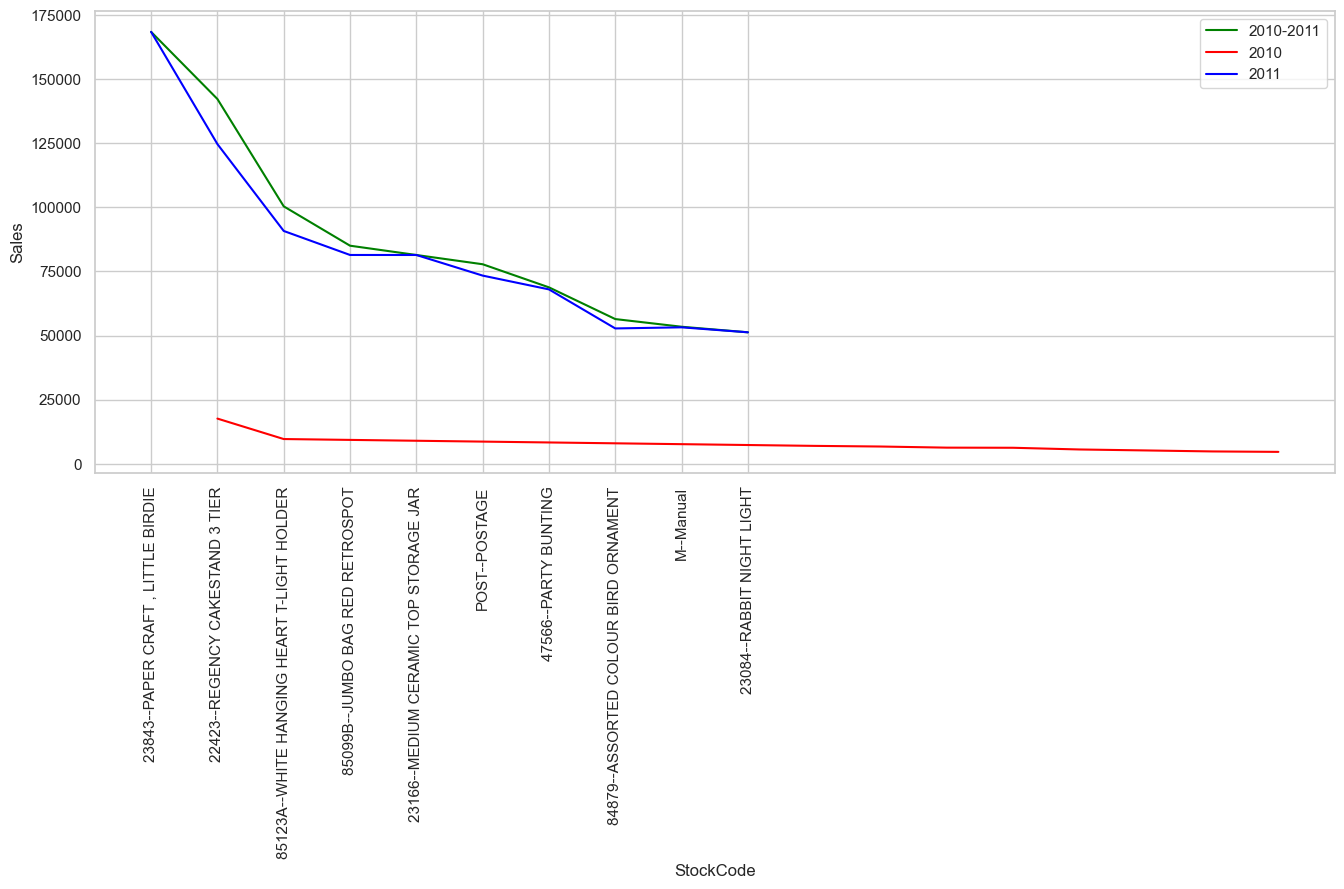

In [344]:
#visualisation of top 10 products with good sales
plt.figure(figsize=(16,6))
sns.lineplot(data=df_bestsellingProduct.head(10),x='StockCode',y='Sales',label='2010-2011',color='green')
sns.lineplot(data=df_2010.head(10),x='StockCode',y='Sales',label='2010',color='red')
sns.lineplot(data=df_2011.head(10),x='StockCode',y='Sales',label='2011',color='blue')
plt.xticks(ticks=df_bestsellingProduct['StockCode'].head(10),labels=df_bestsellingProduct['Merged'].head(10),rotation=90)
plt.show()

* PaperCraft Little Bride(23843) is the best selling product with total sales of 175000 usd

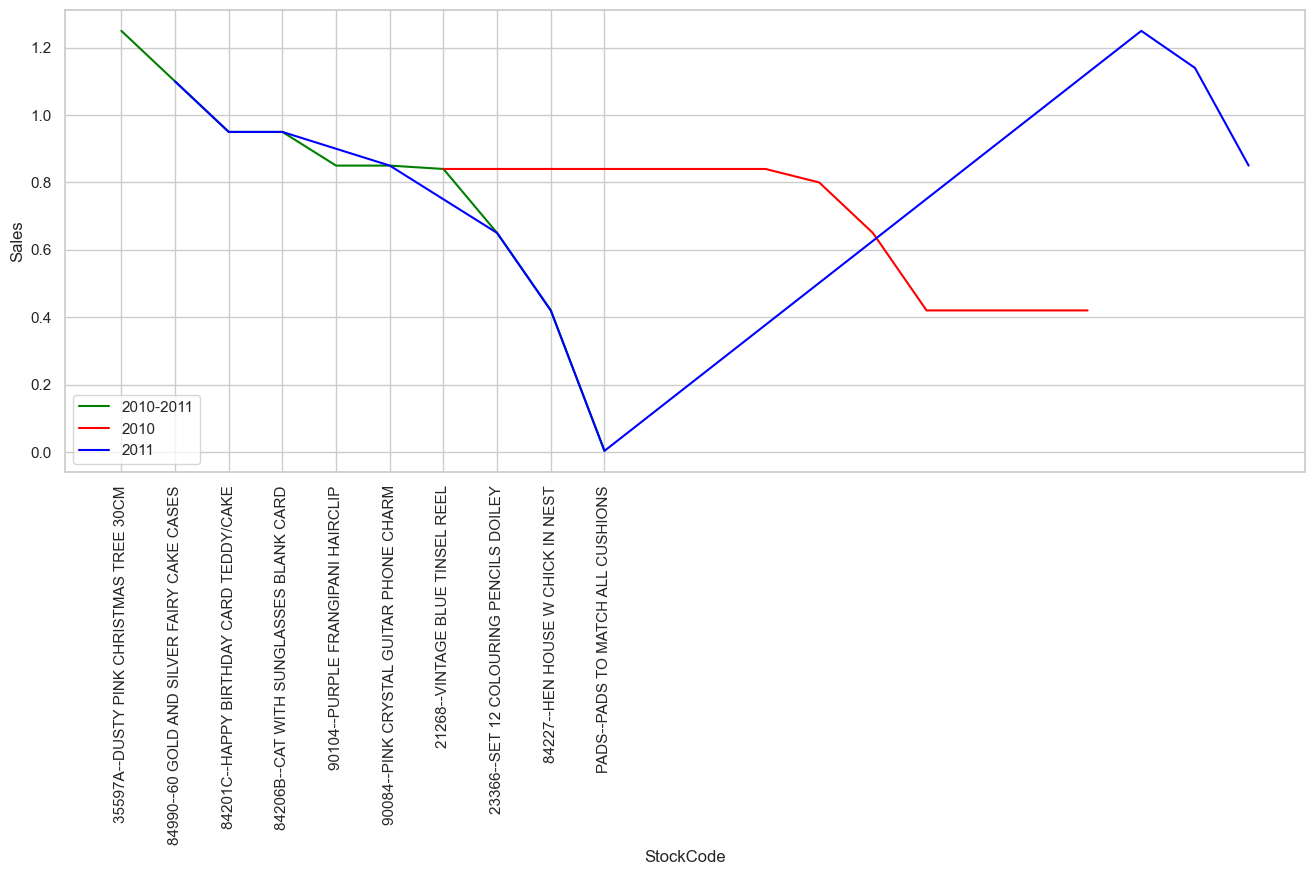

In [346]:
#visualisation of bottom 10 products with least sales
plt.figure(figsize=(16,6))
sns.lineplot(data=df_bestsellingProduct.tail(10),x='StockCode',y='Sales',label='2010-2011',color='green')
sns.lineplot(data=df_2010.tail(10),x='StockCode',y='Sales',label='2010',color='red')
sns.lineplot(data=df_2011.tail(10),x='StockCode',y='Sales',label='2011',color='blue')
plt.xticks(ticks=df_bestsellingProduct['StockCode'].tail(10),labels=df_bestsellingProduct['Merged'].tail(10),rotation=90)
plt.show()

* 84227--HEN HOUSE W CHICK IN NEST and PADS- TO MATCH ALL CUSHIONS	are the products with lowest sale

In [348]:
# Sales on each Month
df_Month=df2.groupby(['Description','StockCode','Month_Num','Month']).agg(Count=('StockCode','size'),TotalQuantity=('Quantity','sum'),Sales=('AmountSpent','sum')).reset_index().sort_values(by='Month_Num')
df_Month

,Description,StockCode,Month_Num,Month,Count,TotalQuantity,Sales
0,4 PURPLE FLOCK DINNER CANDLES,72800B,1,January,3,6,15.30
26183,SET 2 PANTRY DESIGN TEA TOWELS,22989,1,January,7,32,104.00
19319,NUMBER TILE COTTAGE GARDEN 9,22877,1,January,2,10,19.50
8185,DANISH ROSE TRINKET TRAYS,84820,1,January,1,8,10.00
2742,BEADED CRYSTAL HEART PINK ON STICK,85131D,1,January,1,3,3.75
...,...,...,...,...,...,...,...
12521,GLASS SONGBIRD STORAGE JAR,23020,12,December,1,4,50.00
23732,RED DRAWER KNOB ACRYLIC EDWARDIAN,22774,12,December,8,266,255.70
12510,GLASS BEURRE DISH,21658,12,December,9,108,372.84
13017,GREEN 3 PIECE POLKADOT CUTLERY SET,84997A,12,December,13,130,461.58


In [349]:
#Sales_max pattern on each month
max_sales_per_month=df_Month.loc[df_Month.groupby('Month')['Sales'].idxmax()].sort_values('Month_Num')
max_sales_per_month.rename(columns={'Sales':'Max_Sale'},inplace=True)
max_sales_per_month

,Description,StockCode,Month_Num,Month,Count,TotalQuantity,Max_Sale
17757,MEDIUM CERAMIC TOP STORAGE JAR,23166,1,January,7,74267,77248.60
24539,REGENCY CAKESTAND 3 TIER,22423,2,February,121,1157,13101.15
24540,REGENCY CAKESTAND 3 TIER,22423,3,March,170,1425,16234.76
24541,REGENCY CAKESTAND 3 TIER,22423,4,April,147,1092,12591.00
24542,REGENCY CAKESTAND 3 TIER,22423,5,May,160,1086,12432.13
15684,JUMBO BAG RED RETROSPOT,85099B,6,June,155,5535,10234.44
24544,REGENCY CAKESTAND 3 TIER,22423,7,July,147,1439,16306.05
15686,JUMBO BAG RED RETROSPOT,85099B,8,August,178,4630,8756.17
20726,"PAPER CRAFT , LITTLE BIRDIE",23843,9,September,1,80995,168469.60
21432,PICNIC BASKET WICKER 60 PIECES,22502,10,October,2,61,39619.50


In [350]:
##Sales_min pattern on each month
min_sales_per_month=df_Month.loc[df_Month.groupby('Month')['Sales'].idxmin()].sort_values('Month_Num')
min_sales_per_month.rename(columns={'Sales':'Min_Sale'},inplace=True)
min_sales_per_month

,Description,StockCode,Month_Num,Month,Count,TotalQuantity,Min_Sale
24764,"RETRO PILL BOX KEY CHAIN,THE KING",79063C,1,January,1,1,0.190
28075,SET/4 BIRD MIRROR MAGNETS,21311,2,February,1,1,0.290
22949,POPART RECT PENCIL SHARPENER ASST,16054,3,March,1,2,0.240
20316,PADS TO MATCH ALL CUSHIONS,PADS,4,April,1,1,0.001
12860,GLOW IN DARK DOLPHINS,84199,5,May,1,1,0.210
30161,STRAWBERRIES DESIGN FLANNEL,21945,6,June,1,1,0.390
20317,PADS TO MATCH ALL CUSHIONS,PADS,7,July,1,1,0.001
21804,PINK CRYSTAL SKULL PHONE CHARM,90089,8,August,1,1,0.190
20318,PADS TO MATCH ALL CUSHIONS,PADS,9,September,2,2,0.001
24762,"RETRO PILL BOX , REVOLUTIONARY",79063D,10,October,1,1,0.190


Text(0.5, 1.0, 'Minimum Sales on each Month')

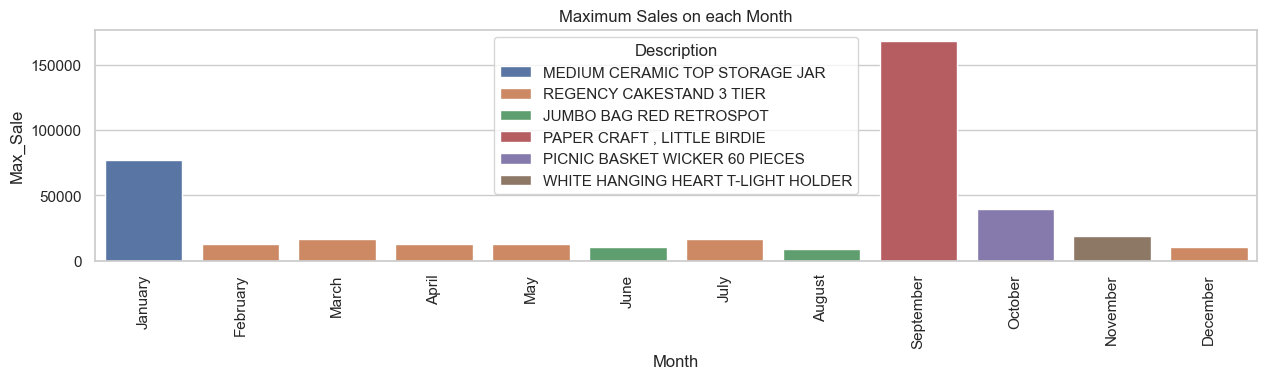

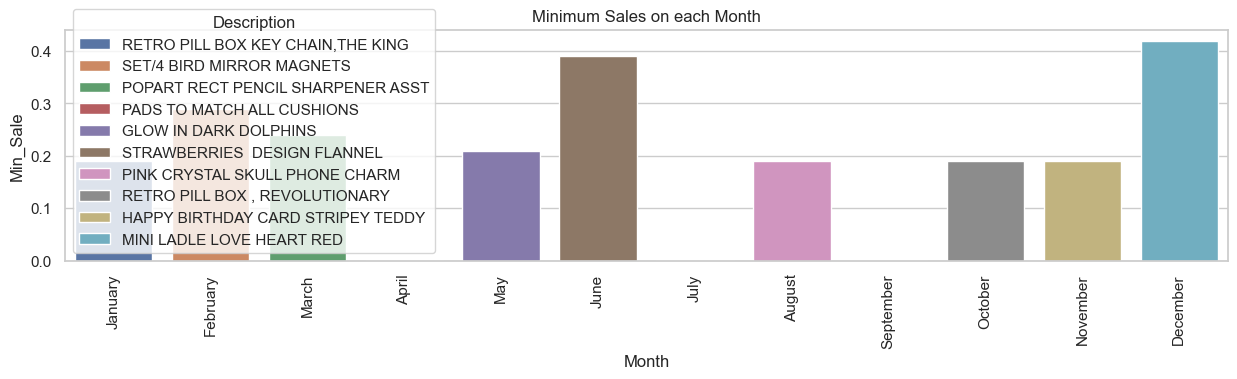

In [351]:
plt.figure(figsize=(15,3))
sns.barplot(data=max_sales_per_month,x='Month',y='Max_Sale',hue='Description')
plt.xticks(rotation=90)
plt.title("Maximum Sales on each Month")
#visualization
plt.figure(figsize=(15,3))
sns.barplot(data=min_sales_per_month,x='Month',y='Min_Sale',hue='Description')
plt.xticks(rotation=90)
plt.title("Minimum Sales on each Month")

In [352]:
#total_sales pattern on each month
df_Month_TotalSales=df_Month.groupby(['Month_Num','Month']).agg(Total_sales=('Sales','sum')).reset_index().sort_values(by=['Month_Num'])
df_Month_TotalSales

,Month_Num,Month,Total_sales
0,1,January,646522.500
1,2,February,532805.230
2,3,March,668510.200
3,4,April,601577.861
4,5,May,748844.180
5,6,June,718087.870
6,7,July,787714.141
7,8,August,646103.790
8,9,September,1131513.612
9,10,October,935414.330


Text(0.5, 1.0, 'Total Sales on each Month')

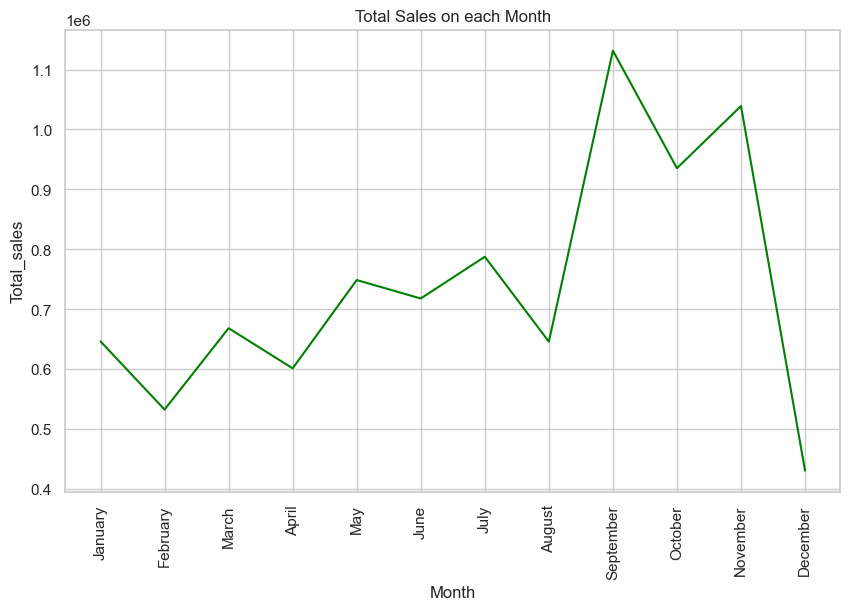

In [353]:
#Visualization of TotalSales pattern on Month
plt.figure(figsize=(10,6))
sns.lineplot(data=df_Month_TotalSales,x='Month',y='Total_sales',color='green')
plt.xticks(rotation=90)
plt.title("Total Sales on each Month")
